GOOGLE DRIVE MOUNTED

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


UNZIP THE ZIP FILE CONTAINING THE TRAINING DATASET

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Welding_classification.zip", 'r')
zip_ref.extractall("/content")
zip_ref.close()

PROPOSED NETWORK ARCHITECTURE

In [ ]:
import tensorflow as tf
inputs = tf.keras.layers.Input(shape = (240, 160, 3))

In [ ]:
import tenFor the current problem statement of classification of welding defects, we have decided to use the CNN model, which is known to provide promising results with training datasets. A CNN model examines a given image piece by piece, picking up features such as edges, corners, colour variation patterns, etc, creating a feature map, with the help of which it classifies the image (in our case, the five different classes of welding defects). We intend to improve the learning and validation accuracy, converge the network, and reduce our custom loss to minimum with the increasing number of the epochs. Each point of the precision curve means the correct prediction rate for the set of train or validation images.
sorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Activation, Flatten
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
outputs = tf.keras.applications.EfficientNetB4(include_top=False, weights=None, input_shape=(240, 160, 3))(inputs)

ADDING GLOBAL AVERAGE POOLING LAYER TO PERFORM A MORE EXTREME TYPE OF DIMENSIOALITY REDUCTION.
DROUTOUT LAYER(factor = 0.2) TO REDUCE THE CHANCES OF OVERFITTING OF MODEL.
DENSE LAYER TO REMOVE THE RESTRICTIONS AND EDIT THE MODEL FOR CLASSIFICATION OF 6 CLASSES, WITH AN ACTIVATION OF SIGMOID WHICH PROVIDES THE PROBABILITY OF OCCURING OF EACH AND EVERY CLASS PRESENT IN TRAINING DATASET.

In [ ]:
global_average_pooling = tf.keras.layers.GlobalAveragePooling2D()(outputs)
dropout_layer = tf.keras.layers.Dropout(0.2)(global_average_pooling)
dense_layer = tf.keras.layers.Dense(6)(dropout_layer)
activation_layer = Activation('softmax')(dense_layer)

In [ ]:
model_final = tf.keras.models.Model(inputs = inputs, outputs = activation_layer)

PLOT AND SUMMARY OF THE NETWORK ARCHITECTURE.

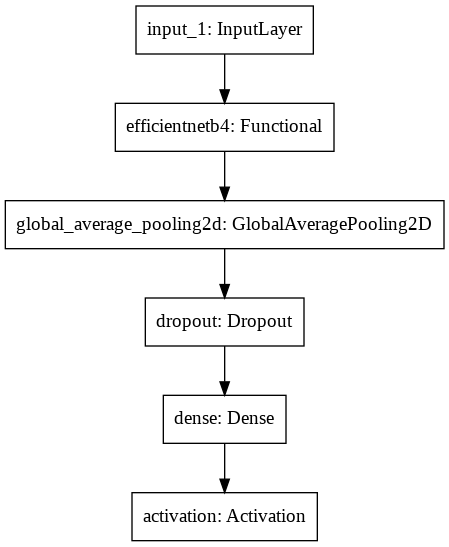

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_final)

In [ ]:
model_final.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 240, 160, 3)]     0         
_________________________________________________________________
efficientnetb4 (Functional)  (None, 8, 5, 1792)        17673823  
_________________________________________________________________
global_average_pooling2d (Gl (None, 1792)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1792)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 10758     
_________________________________________________________________
activation (Activation)      (None, 6)                 0         
Total params: 17,684,581
Trainable params: 17,559,374
Non-trainable params: 125,207
___________________________________________

LOADING AND REQUIRED DATA GENERATION FOR THE CLASSIFICATION TASK.(EACH AND EVERY IMAGE IS RESIZED TO (240 x 160 x 3) AND IS APPENDED TO THE LIST NAMED IMG_PATHS), INCLUDING TO THIS THE CLASS CORRESPONDING TO THE IMAGE IS APPENDED IN THE LIST NAMED CLASSES.

In [ ]:
import os
import numpy as np

img_paths = []
classes = []
data_dir = '/content/train'
for i in os.listdir(data_dir):
  for j in os.listdir(data_dir + '/' + i):
    for k in os.listdir(data_dir + '/' + i + '/' + j):
      img = cv2.imread(data_dir + '/' + i + '/' + j + '/' + k)
      img = cv2.resize(img, (160,240))
      img = img / 255.0      
      img_paths.append(img)
      classes.append(i)
img_paths=np.array(img_paths, dtype=np.float32)

In [ ]:
classes = np.array(classes)

In [ ]:
print(img_paths.shape)
print(classes)

(5841, 240, 160, 3)
['lack_of_fusion' 'lack_of_fusion' 'lack_of_fusion' ... 'good_weld'
 'good_weld' 'good_weld']


SHUFFLING IS A GOOD PRACTICE THAT SHOULD BE DONE DURING THE TIME OF TRAINING, WHICH HELP THE MODEL TO BE TRAINED FOR ALL THE CLASSES EQUALLY AND NOT GETTING TRAINED FOR 1 CLASS AT A TIME.

In [ ]:
shuffle = np.random.choice(range(len(img_paths)), len(img_paths), replace = False)
img_paths = [img_paths[i] for i in shuffle]
classes = [classes[i] for i in shuffle]

In [ ]:
print(classes)

['lack_of_penetration', 'lack_of_penetration', 'lack_of_penetration', 'misalignment', 'good_weld', 'good_weld', 'misalignment', 'burn_through', 'good_weld', 'misalignment', 'lack_of_penetration', 'misalignment', 'good_weld', 'misalignment', 'contamination', 'lack_of_fusion', 'burn_through', 'misalignment', 'burn_through', 'contamination', 'lack_of_fusion', 'good_weld', 'contamination', 'lack_of_fusion', 'burn_through', 'lack_of_penetration', 'lack_of_fusion', 'good_weld', 'misalignment', 'lack_of_penetration', 'misalignment', 'good_weld', 'lack_of_penetration', 'burn_through', 'contamination', 'contamination', 'lack_of_fusion', 'contamination', 'lack_of_fusion', 'burn_through', 'burn_through', 'lack_of_penetration', 'lack_of_penetration', 'misalignment', 'good_weld', 'misalignment', 'contamination', 'lack_of_penetration', 'good_weld', 'misalignment', 'lack_of_penetration', 'contamination', 'burn_through', 'lack_of_fusion', 'lack_of_fusion', 'contamination', 'lack_of_fusion', 'burn_thro

In [ ]:
NOW, LABEL BINARIZER HELPS TO CONVERT THE STRING FORMAT DATA OF CLASSES TO THE INTEGER FORMAT.
IT DOES SO BY MAKING A ONE DIMENSIONAL ARRAY WHICH CONTAINS ONES AND ZEROS, ONES AT THE PLACE WHERE CLASS
IS PRESENT AND ZERO WHERE THE CORRESPONDING CLASS IS NOT PRESENT.

In [ ]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
classes = lb.fit_transform(classes)

In [ ]:
img_paths = np.array(img_paths)

ADAM OPTIMIZER IS USED FOR TRAINING THE CLASSIFICATION PROBLEM WITH THE LEARNING RATE OF 0.005,
AND IS THEN COMPILED BY USING THE "CATEGORICAL CROSSENTROPY" AS A LOSS FUNCTION AND ACCURACY AS AN ADDITIONAL 
METRICS TO BE SHOWN DURING THE TIME OF TRAINING.

In [ ]:
from tensorflow.keras.optimizers import Adam
optimizer=Adam(learning_rate=0.005)

CATEGORICAL CROSSENTROPY LOSS, ALSO CALLED SOFTMAX LOSS, IS USED WHEN WE TRAIN A CNN AND OUTPUTS A PROBABILITY OVER C CLASSES FOR EACH IMAGE. IT IS USED FOR MULTI-CLASS CLASSIFICATION.

In [ ]:
model_final.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

CHECKPOIMTS ARE BR=EING SAVED TO A FAVOURABLE LOCATION IN THE GOOGLE DRIVE.
AND TRAINING CONTINUES....

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
callbacks = [
    ModelCheckpoint('/content/drive/MyDrive/welding/checkpoints/train_{epoch}.tf',
                    verbose=1, save_weights_only=True)]

In [ ]:
history = model_final.fit(img_paths, classes, epochs = 20, validation_split=0.05, verbose = 1, batch_size=16, callbacks=callbacks)

Epoch 1/20
347/347 [==============================] - 163s 333ms/step - loss: 1.8314 - accuracy: 0.3407 - val_loss: 4.7467 - val_accuracy: 0.1263

Epoch 00001: saving model to /content/drive/MyDrive/welding/checkpoints/train_1.tf
Epoch 2/20
347/347 [==============================] - 112s 322ms/step - loss: 0.6064 - accuracy: 0.7836 - val_loss: 0.4845 - val_accuracy: 0.8362

Epoch 00002: saving model to /content/drive/MyDrive/welding/checkpoints/train_2.tf
Epoch 3/20
347/347 [==============================] - 112s 323ms/step - loss: 0.2852 - accuracy: 0.9061 - val_loss: 0.9414 - val_accuracy: 0.8020

Epoch 00003: saving model to /content/drive/MyDrive/welding/checkpoints/train_3.tf
Epoch 4/20
347/347 [==============================] - 112s 323ms/step - loss: 0.1997 - accuracy: 0.9396 - val_loss: 0.0872 - val_accuracy: 0.9659

Epoch 00004: saving model to /content/drive/MyDrive/welding/checkpoints/train_4.tf
Epoch 5/20
347/347 [==============================] - 112s 322ms/step - loss: 0.

In [ ]:
THE FOLLOWING CODE IS USED FOR PLOTTING OF LOSS AND ACCURACY CURVES CORRESPONDING TO EACH AND EVERY EPOCH.

No handles with labels found to put in legend.


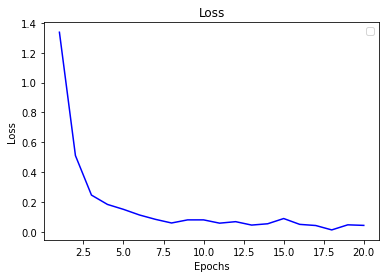

In [ ]:
import matplotlib.pyplot as plt
history.history.keys()
loss = history.history['loss']
epochs = range(1,21)
plt.plot(epochs, loss, 'b')
# plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()